# The Transport Equation

Consider the transport equation $u_t + u_x = 0$ for $x \in [−1, 3]$ and $t \geq 0$ with the following two sets of initial conditions:

\begin{equation*}
u(0,x) = \left\{
        \begin{array}{ll}
            1-|x| & \quad \text{if } |x| \leq 1 \\
            0 & \quad \text{otherwise}
        \end{array}
    \right.
\end{equation*}

Use the finite difference scheme

$$ \frac{ u_j^{n+1} - u_j^n }{ \Delta t} + \frac{  u_{j+1}^{n} - u_j^n  }{\Delta x} = 0 $$

with right-point boundary condition $u_M^{n+1} = u_{M-1}^{n+1}$ , where $x_M = 3$, to compute an approximation to the solution at several (up to 40) time steps. Employ $\Delta x = 0.02$ and $\lambda = \Delta t/\Delta x = 0.8$. 
#### Demonstrate numerically (plot the solution) the instability of this scheme and show that it manifest itself sooner for the less smooth initial condition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[0, 5, 10]


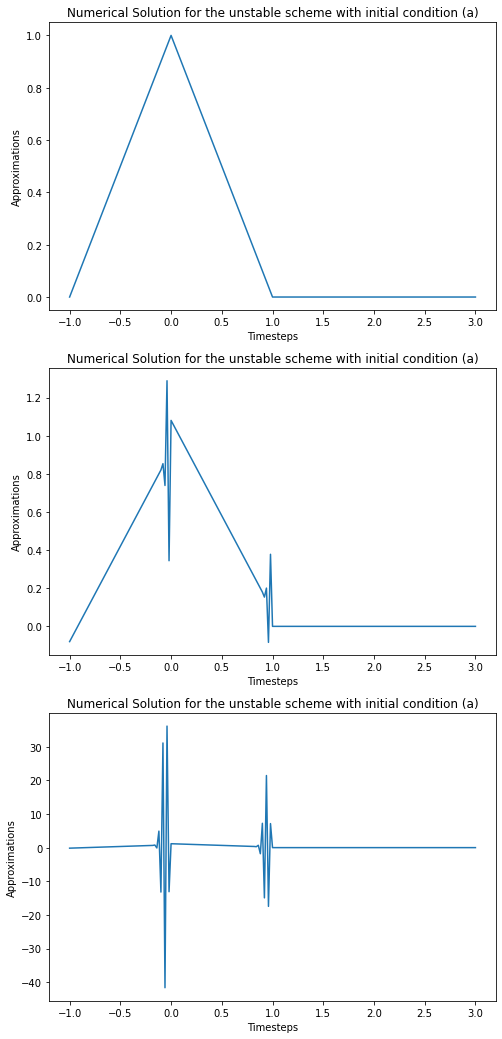

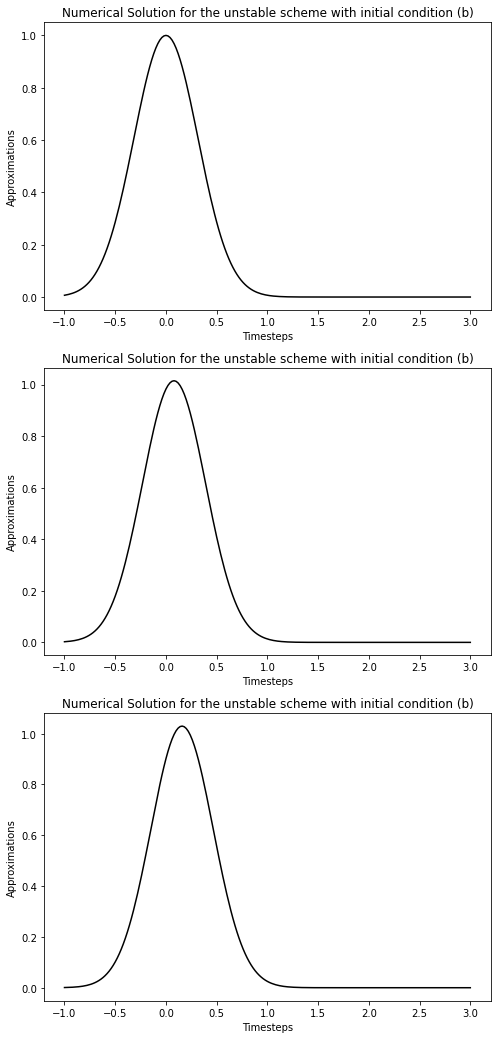

In [42]:
def fd_scheme(u_init, delta_x, delta_t, N, timesteps_to_display):
    u_approx = u_init
    alpha = delta_t/delta_x
    
    result = []
    
    if 0 in timesteps_to_display:
        result.append(u_approx)
        
    for i in range(1, N+1):
        u_approx = u_approx[:-1] - alpha*(u_approx[1:] - u_approx[:-1])
        u_approx = np.append(u_approx, u_approx[-1])
        
        if i in timesteps_to_display:
            result.append(u_approx)
        
    return result

delta_x = 0.02
M = int(4/delta_x)   # number of space steps
delta_t = 0.8 * delta_x
timestep_count = int((40/5) - 5)    # number of timesteps that we are going to plot = 3
# we are going to plot the 0th, 5th, 10th timestep 

timesteps_to_display = [5*i for i in range(timestep_count)]

x_values = np.linspace(-1.0, 3.0, M+1)
u_init_a = np.where(np.abs(x_values) <= 1, 1-np.abs(x_values), 0)
u_init_b = np.exp(-5*(x_values**2))

approxs_a = fd_scheme(u_init_a, delta_x, delta_t, 40, timesteps_to_display)
approxs_b = fd_scheme(u_init_b, delta_x, delta_t, 40, timesteps_to_display)

fig, axs = plt.subplots(timestep_count, figsize = (8, 6*timestep_count))

for i in range(timestep_count):
    ax = axs[i]
    ax.plot(x_values, approxs_a[i])
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Approximations')
    ax.set_title('Numerical Solution for the unstable scheme with initial condition (a)')
    
    
fig, axs = plt.subplots(timestep_count, figsize = (8, 6*timestep_count))
for i in range(timestep_count):
    ax = axs[i]
    ax.plot(x_values, approxs_b[i], "k")
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Approximations')
    ax.set_title('Numerical Solution for the unstable scheme with initial condition (b)')
    

#### Comment on the localization of the onset of instability for initial condition (a) and give an estimate of the expected growth rate of the instability per time step.

From the plots above, we can see that the unstability is occuring at $x=0$ and $x=1$. The reason is that the function we are working with is not smooth, and thus we get an unstability in the plots. Furthermore, it indicates that the method may be inconsistent. This concides with the unstability becoming evident sooner in the plots of the initial condition (a).

To estimate the expected growth rate of the instability per time step, let $\lambda = \Delta t / \Delta x$. Then

\begin{equation}
\begin{split}
u_j^{n+1} & = \lambda \bigg( u_{j+1}^{n} - u_j^n \bigg) + u_j^n\\
& = \bigg(1 + \lambda \bigg)u_j^n - \lambda u_{j+1}^{n}
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\Rightarrow |u_j^{n+1}| & = |\bigg(1 + \lambda \bigg)u_j^n - \lambda u_{j+1}^{n}| \\
& \leq |\bigg(1 + \lambda \bigg)u_j^n| - |\lambda u_{j+1}^{n}|\\
& = \bigg(1 + \lambda \bigg)|u_j^n| - \lambda |u_{j+1}^{n}|
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\Rightarrow ||u^{n+1}|| & \leq \bigg(1 + \lambda \bigg)||u^n|| - \lambda ||u^{n}||\\
& = \bigg(1 + 2\lambda \bigg)||u^n||
\end{split}
\end{equation}

The above equation tells us that infinity norm of the $u^{n+1}$ is $(1+2\lambda)$ times less than the infinity norm of $u^n$, thus we get the expected growth rate of $(1+2\lambda)$ of the instability per time step.

#### Using the left boundary condition $u(−1) = 0$, write a stable scheme and compute the corresponding approximations for initial conditions (a) and (b). Plot the approximations at representative time steps. Use again $\Delta x = 0.02$ and $\lambda = 0.8.$

We can use the following stable scheme
$$ \frac{ u_{j+1}^{n+1} - u_{j+1}^{n} }{\Delta t} + \frac{ u_{j+1}^n - u_j^n }{\Delta x} = 0 $$

This is pretty much similar to problem (a), the only difference is that we are shifting the indices by 1.

We can rewrite it as 



$$ u_{j+1}^{n+1}  = u_{j+1}^{n} - \alpha \bigg( u_{j+1}^n - u_j^n \bigg)   $$

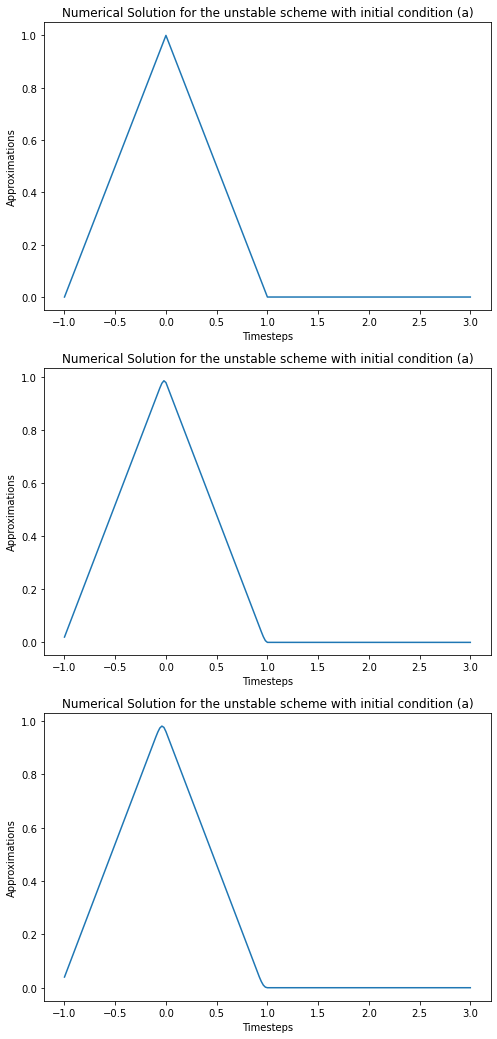

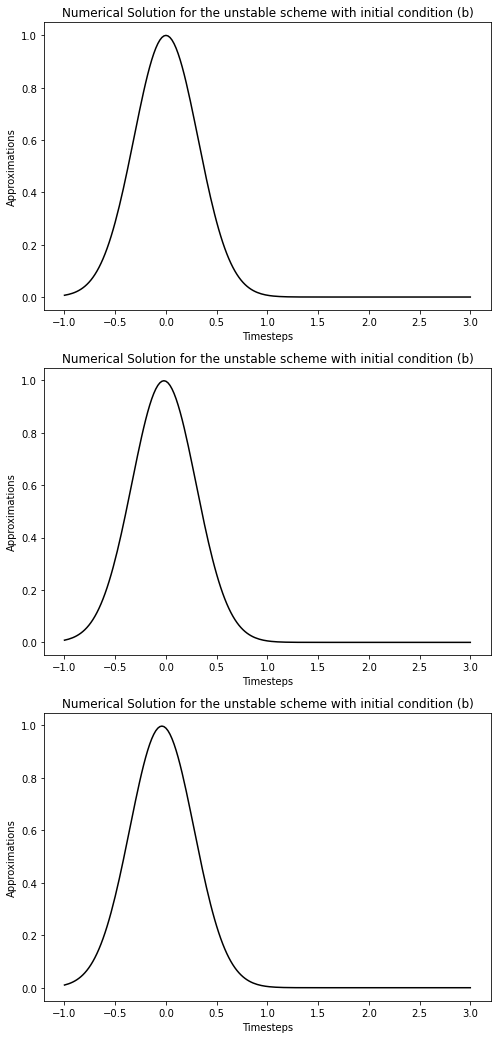

In [43]:
def fd_scheme(u_init, delta_x, delta_t, N, timesteps_to_display):
    u_approx = u_init
    alpha = delta_t/delta_x
    
    result = []
    
    if 0 in timesteps_to_display:
        result.append(u_approx)
        
    for i in range(1, N+1):
        u_approx = u_approx[1:] - alpha * (u_approx[1:] - u_approx[:-1])
        u_approx = np.append(u_approx, u_approx[-1])
        
        if i in timesteps_to_display:
            result.append(u_approx)
        
    return result

delta_x = 0.02
M = int(4/delta_x)   # number of space steps
delta_t = 0.8 * delta_x
timestep_count = int((40/5) - 5)    # number of timesteps that we are going to plot = 3
# we are going to plot the 0th, 5th, and 10th  timestep 

timesteps_to_display = [5*i for i in range(timestep_count)]

x_values = np.linspace(-1.0, 3.0, M+1)
u_init_a = np.where(np.abs(x_values) <= 1, 1-np.abs(x_values), 0)
u_init_b = np.exp(-5*(x_values**2))

approxs_a = fd_scheme(u_init_a, delta_x, delta_t, 40, timesteps_to_display)
approxs_b = fd_scheme(u_init_b, delta_x, delta_t, 40, timesteps_to_display)

fig, axs = plt.subplots(timestep_count, figsize = (8, 6*timestep_count))
for i in range(timestep_count):
    ax = axs[i]
    ax.plot(x_values, approxs_a[i])
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Approximations')
    ax.set_title('Numerical Solution for the unstable scheme with initial condition (a)')
    
    
fig, axs = plt.subplots(timestep_count, figsize = (8, 6*timestep_count))
for i in range(timestep_count):
    ax = axs[i]
    ax.plot(x_values, approxs_b[i], "k")
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Approximations')
    ax.set_title('Numerical Solution for the unstable scheme with initial condition (b)')
    